In [11]:
import pandas as pd

# url = "https://raw.githubusercontent.com/accarter/time-predictor/master/top_times.csv"
url = "../top_times.csv"

dtype = {col: int if col in int_cols else str for col in columns}

top_times = pd.read_csv(url, sep="\t")
top_times.head()

,result_rank,full_name,distance,time_id,event_desc,swimmer_age,swim_time_formatted,alt_adj_swim_time_formatted,standard_name,meet_name,swim_date,club_name,lsc_id,foreign_yesno,hytek_power_points,event_id,gender
0,1,"Dressel, Caeleb",100,149090949,100 FL LCM,22,49.5,49.5,2020 Olympic Trials,2019 World Champs,7/26/2019,Unattached,FL,NaN,1125,72,m
1,2,"Schooling, Joe",100,110533250,100 FL LCM,21,50.39,50.39,2019 Summer Nationals (LCM),2016 Olympic Games,8/12/2016,Unattached,ST,Yes,1083,72,m
2,3,"Phelps, Michael",100,99519625,100 FL LCM,30,50.45,50.45,2020 Olympic Trials,2015 Summer Nationals,8/8/2015,North Baltimore Aquatic Club,MD,NaN,1080,72,m
3,4,"Rooney, Maxime",100,143734453,100 FL LCM,21,50.68,50.68,2020 Olympic Trials,2019 Summer Nationals,8/2/2019,Pleasanton Seahawks,PC,NaN,1069,72,m
4,5,"Minakov, Andrei",100,149090954,100 FL LCM,17,50.83,50.83,2020 Olympic Trials,2019 World Champs,7/27/2019,Unattached,PC,Yes,1077,72,m


In [3]:
top_times_uniq_names = top_times.drop_duplicates(subset=["full_name", "event_desc"])
top_times_uniq_names.head()

NameError: name 'top_times' is not defined

In [3]:
top_times_uniq_names = top_times_uniq_names[~top_times_uniq_names["swim_time_formatted"].str.contains('CM')]

In [4]:
def time_to_ml(row):
    time = row["swim_time_formatted"].strip("r")
    minutes = 0
    if ":" in time:
        minutes, time = time.split(":")
    try:
        seconds, hundredths = time.split(".")
    except:
        print(time)
    return int(minutes) * 60 * 1000 + int(seconds) * 1000 + int(hundredths) * 10

top_times_uniq_names["swim_time_formatted"] = top_times_uniq_names.apply(time_to_ml, axis=1)

In [5]:
individual_results = pd.pivot_table(
    top_times_uniq_names,
    index=["full_name"], 
    columns="event_desc", 
    values="swim_time_formatted"
)


individual_results = individual_results.reset_index()
print(individual_results.shape)
individual_results.head()

(76728, 54)


event_desc,full_name,100 BK LCM,100 BK SCM,100 BK SCY,100 BR LCM,100 BR SCM,100 BR SCY,100 FL LCM,100 FL SCM,100 FL SCY,...,50 BR SCY,50 FL LCM,50 FL SCM,50 FL SCY,50 FR LCM,50 FR SCM,50 FR SCY,500 FR SCY,800 FR LCM,800 FR SCM
0,"ASAKAWA, Tiago",NaN,NaN,NaN,NaN,NaN,58900.0,NaN,NaN,50830.0,...,NaN,NaN,NaN,NaN,NaN,NaN,20290.0,NaN,NaN,NaN
1,"AXIOTIS, Alex",NaN,NaN,NaN,67290.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Aaby, Kara",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Aakhus, Randy",62060.0,NaN,49380.0,69880.0,NaN,58990.0,58480.0,NaN,49150.0,...,NaN,NaN,NaN,23610.0,NaN,NaN,NaN,272090.0,NaN,NaN
4,"Aalbu, Connor",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,43640.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
individual_results[individual_results["full_name"] == "Dressel, Caeleb"].T

,17406
event_desc,
full_name,"Dressel, Caeleb"
100 BK LCM,55800
100 BK SCM,NaN
100 BK SCY,48490
100 BR LCM,61220
100 BR SCM,NaN
100 BR SCY,50030
100 FL LCM,49050
100 FL SCM,48710


In [7]:
import numpy as np

# predict times for event2 using times from event1

def mask_for_events(df, *args):
    mask = np.array([True] * df.shape[0])
    for arg in args:
        mask = mask & ~np.isnan(df[arg])
    return mask
    

features = ["100 FR SCY"]
target = "100 FR LCM"

mask = mask_for_events(individual_results, target, *features)
fr_50 = individual_results[mask][['full_name', target] + features]

print(fr_50.shape)
fr_50.head()

(5073, 3)


event_desc,full_name,100 FR LCM,100 FR SCY
7,"Aarons, Brent",53580.0,46810.0
23,"Abaqueta, Cam",53050.0,45730.0
27,"Abbas, Austin",54440.0,46630.0
37,"Abbott, Danny",53290.0,46550.0
44,"Abboud, Brandon",54020.0,45710.0


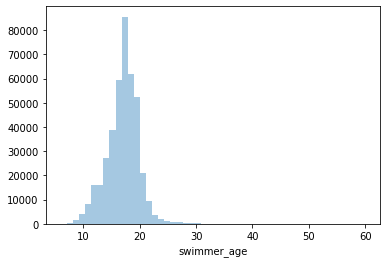

In [8]:
import seaborn as sns

sns.distplot(top_times_uniq_names["swimmer_age"], kde=False);

In [9]:
from sklearn.metrics import mean_absolute_error

X_train = fr_50[features]
y_train = fr_50[target]

def scy_to_lcm(t):
  '''
  Linear equation used by classic conversion utility found at
  https://swimswam.com/swimming-times-conversion-tool/?type=classic
  '''
  return t * 1.11 + 1.60

mae = mean_absolute_error(y_train, y_train.apply(scy_to_lcm))
print("Baseline mae:", mae)

Baseline mae: 5801.390222747886


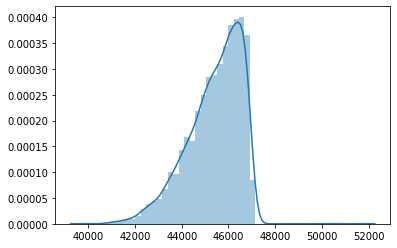

In [10]:
import seaborn as sns

sns.distplot(X_train);

In [11]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
print("Linear Regression mae:", mean_absolute_error(y_train, reg.predict(X_train)))

Linear Regression mae: 608.9016126489743


In [12]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor().fit(X_train, y_train)
print("Random Forest Regressor mae:", mean_absolute_error(y_train, reg.predict(X_train)))

Random Forest Regressor mae: 569.2530615847825


In [22]:
import pickle

filename = 'model.sav'
with open(filename, 'wb') as f:
    pickle.dump(reg, f)

In [13]:
def find_conversion(t1, t2):
  return t2 / t1

print(find_conversion(60, 68.2))
print(find_conversion(90, 101.5))
print(find_conversion(120, 134.8))

1.1366666666666667
1.1277777777777778
1.1233333333333335


In [14]:
x1 = 60
y1 = 68.2
x2 = 120
y2 = 134.8

(y2 - y1) / (x2 - x1)

1.11

In [15]:
68.2 - x1 * 1.11

1.5999999999999943

In [16]:
scy_to_lcm(120)

134.8

In [17]:
def find_eq(x1, y1, x2, y2):
  m = (y2 - y1) / (x2 - x1)
  b = y1 - x1 * m
  def eq(t):
    return t * m + b
  return eq

fr = find_eq(41.44, 47.96, 53.91, 62.3)
fr(46.35)

53.60630312750602

In [18]:
times = [[41440, 47960],
         [42430, 49220],
         [43420, 50470],
         [44020, 51210],
         [44480, 51760],
         [44870, 52220],
         [45250, 52660],
         [45610, 53080],
         [45980, 53500],
         [46350, 53910],
         [46740, 54350],
         [47140, 54790],
         [47570, 55270],
         [48020, 55770],
         [48510, 56310],
         [49050, 56910],
         [49650, 57580],
         [50340, 58350],
         [51170, 59270],
         [52250, 60460],
         [53910, 62300]]

times = np.array(times)

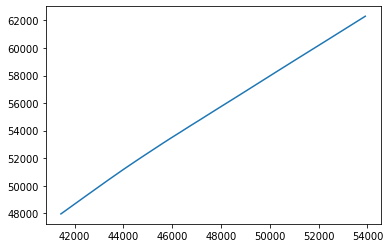

In [19]:
import matplotlib.pyplot as plt

x, y = (times[:, i] for i in range(2))

plt.plot(x,y);

In [20]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(times[:, 0].reshape(-1,1), times[:, 1])
print("Linear Regression mae:", mean_absolute_error(y_train, reg.predict(X_train)))
reg.predict(np.array(45610).reshape(-1,1))

Linear Regression mae: 628.2314785033099


array([52988.86715917])

In [21]:
reg.coef_, reg.intercept_

(array([1.137999]), 1084.7326979892678)